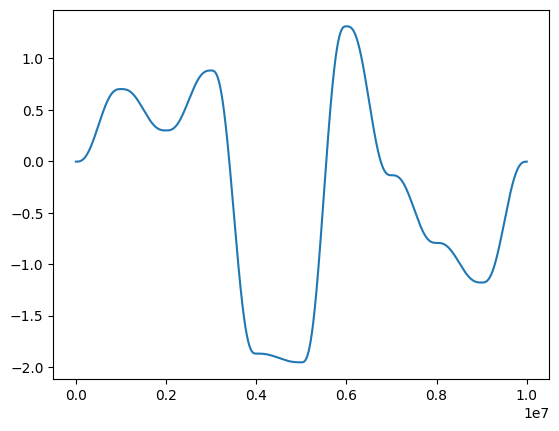

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import numba


@numba.njit
def fade(t):
    return t * t * t * (t * (t * 6 - 15) + 10)


@numba.njit
def lerp(a, b, t):
    return a + t * (b - a)


@numba.njit(parallel=True)
def perlin_1d(size, freq):
    grad = np.random.randn(freq + 1)
    x = np.linspace(0, freq, size)
    xi = np.floor(x).astype(np.int32)
    xf = x - xi
    u = fade(xf)

    values = np.empty(size)
    for i in numba.prange(size):
        values[i] = lerp(grad[xi[i] % freq], grad[(xi[i] + 1) % freq], u[i])

    return values


size = 10_000_000
freq = 10
perlin_noise = perlin_1d(size, freq)

plt.plot(perlin_noise)
plt.show()